In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Visualization**

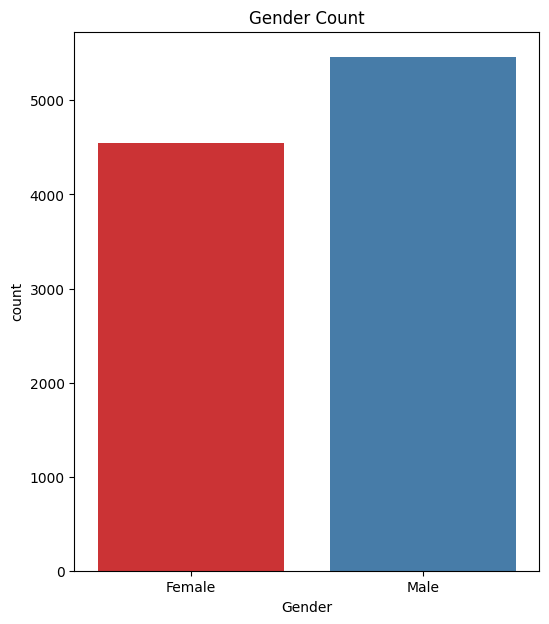

In [9]:
plt.figure(figsize=(6,7))
sns.countplot(x=df['Gender'],  palette='Set1')
plt.title('Gender Count')
plt.show()

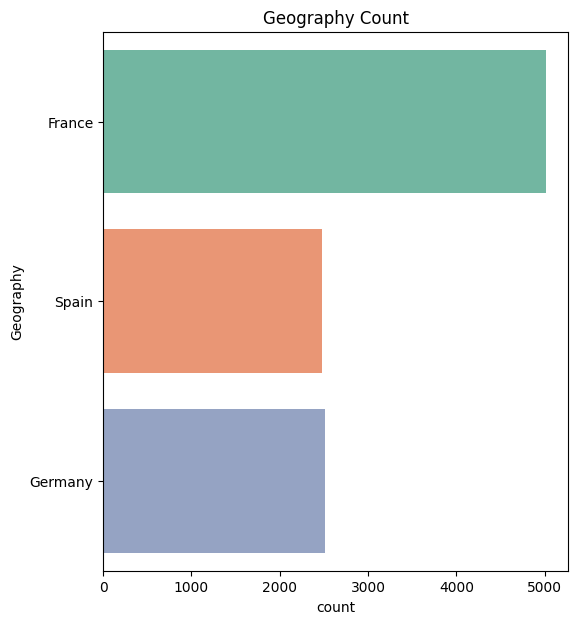

In [10]:
plt.figure(figsize=(6,7))
sns.countplot(data=df, y='Geography',  palette='Set2')
plt.title('Geography Count')
plt.show()

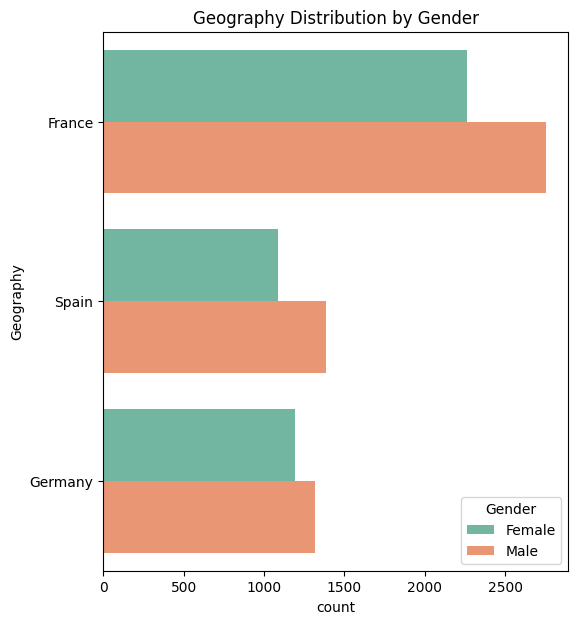

In [11]:
plt.figure(figsize=(6,7))
sns.countplot(data=df, y='Geography', hue='Gender', palette='Set2')
plt.title('Geography Distribution by Gender')
plt.show()

In [12]:
churned_cnt = df[df['Exited']==0]['Exited'].count()
retained_cnt = df[df['Exited']==1]['Exited'].count()
print("Churned Count: ",churned_cnt)
print("Retained Count: ",retained_cnt)

Churned Count:  7963
Retained Count:  2037


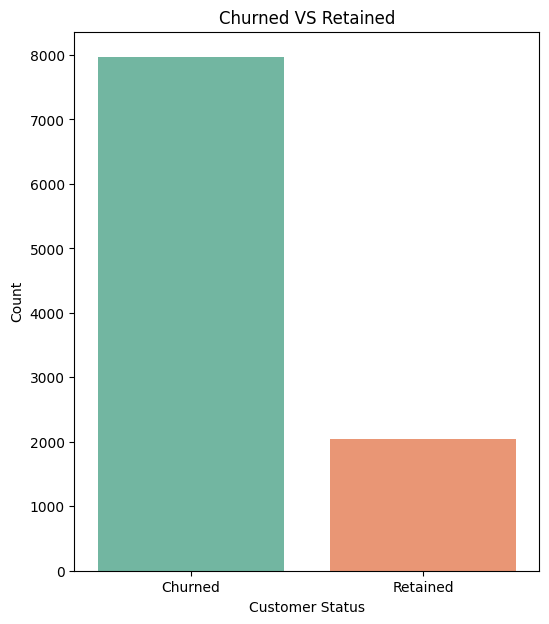

In [13]:
plt.figure(figsize=(6,7))
sns.barplot(x=['Churned', 'Retained'], y=[churned_cnt, retained_cnt], palette='Set2')
plt.title('Churned VS Retained')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

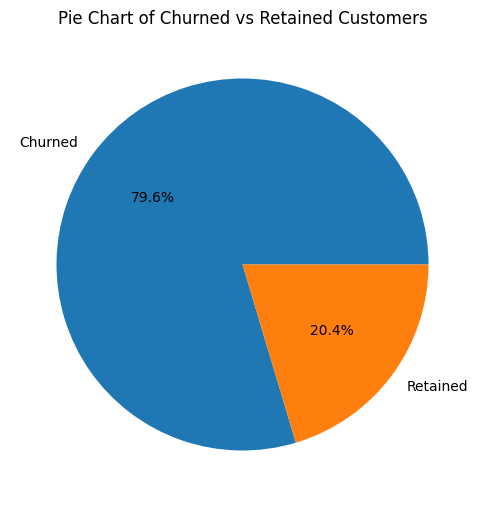

In [14]:
data = pd.Series([churned_cnt, retained_cnt], index=['Churned', 'Retained'])
plt.figure(figsize=(6,7))
data.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Churned vs Retained Customers')
plt.show()

In [15]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Handling Categorical Columns**

In [17]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [18]:
df['Gender'].value_counts().to_dict()

{'Male': 5457, 'Female': 4543}

In [19]:
df.replace({'Male': 1, 'Female': 0}, inplace=True)

In [20]:
df = pd.get_dummies(df, columns=['Geography'], dtype=int)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Splitting the Data**

In [21]:
x = df.drop(['Exited'], axis=1)
y = df['Exited']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5, stratify=y)

**Scaling**

In [23]:
normal_scaler = MinMaxScaler()
array1 = normal_scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(array1, columns=x_train.columns)
# print(x_train_scaled)

array2 = normal_scaler.transform(x_test)
x_test_scaled = pd.DataFrame(array2, columns=x_test.columns)
# print(x_test_scaled)

**Model Building**

In [24]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12, )))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
hist_obj = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6744 - loss: 0.6104 - val_accuracy: 0.7944 - val_loss: 0.4945
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4862 - val_accuracy: 0.7944 - val_loss: 0.4818
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4711 - val_accuracy: 0.8000 - val_loss: 0.4746
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4732 - val_accuracy: 0.7994 - val_loss: 0.4695
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.4361 - val_accuracy: 0.8119 - val_loss: 0.4534
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4445 - val_accuracy: 0.8144 - val_loss: 0.4413
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.4300 - val_accuracy: 0.8188 - val_loss: 0.4260
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.4227 - val_accu

In [28]:
model.layers[0].get_weights()

[array([[ 0.44332153, -0.57465947,  0.48122194, -0.4070384 ,  0.1536533 ,
          0.38852045,  0.22221893, -0.04612204, -0.164834  ,  0.20346883,
          0.21468541,  0.12500994],
        [-0.12110274, -0.54741204,  0.3716244 , -0.12700918,  0.03645451,
          0.569775  , -0.16501674,  0.05575912,  0.6114601 ,  0.367222  ,
          0.11271707,  0.00419099],
        [-0.10650183, -0.05989656,  0.40947646,  0.30887026, -0.46992773,
          0.15918298,  0.29635745, -0.08352701,  0.12884401, -0.01415375,
          0.75878227, -1.9928956 ],
        [ 0.23607399, -0.42944226, -0.12409578, -0.26959085,  0.10847504,
         -0.04420468, -0.17633046,  0.01173937,  0.5170025 ,  0.07441241,
          0.38836247, -0.10055633],
        [ 0.484499  ,  0.7224322 ,  0.14146641, -0.76185143, -0.25289628,
          0.22093587, -1.3411014 ,  0.3583159 , -0.27283105, -0.36433387,
         -0.22472003,  0.10943687],
        [-0.12791397, -1.299132  , -0.23591736, -0.25585133,  0.22591867,
      

In [29]:
model.layers[1].get_weights()

[array([[-0.08770185, -0.39755285,  0.50080085,  0.10037628, -0.0372313 ,
         -0.6086189 ],
        [-0.36339638, -0.90899765,  1.0089025 , -0.03794404,  1.4670345 ,
         -1.0877123 ],
        [-0.6192271 , -0.08821528,  0.41821784, -0.41651735,  0.20013846,
          0.24299873],
        [-0.3220257 , -0.19676766,  0.47285447,  0.40976587,  0.14777029,
         -0.42668936],
        [-0.4978287 , -0.18941893, -0.31340328, -0.07312647,  0.12737842,
          0.5470889 ],
        [ 0.09496468,  0.27211356, -0.38405082,  0.54876155,  0.20143127,
          0.36076686],
        [-0.6386782 , -0.16925333,  0.3456422 , -0.07918986, -0.8888701 ,
         -0.30352557],
        [ 0.38183564, -2.318937  ,  1.9255921 , -0.22507255,  2.2416909 ,
         -2.3137834 ],
        [-0.18402311,  0.15093464, -0.00965053, -0.02533016, -0.33117503,
          0.29192632],
        [-0.03693591, -0.6829348 ,  0.54743165,  0.19097067, -0.4256273 ,
         -0.73691034],
        [-0.17751674,  0.64346

In [30]:
model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.20553233],
       [0.09724777],
       [0.39996204],
       ...,
       [0.12239742],
       [0.16621575],
       [0.03189534]], dtype=float32)

In [31]:
y_pred = np.where(model.predict(x_test_scaled)>0.5 , 1, 0)
print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)*100
round_off = np.around(acc)
print("Accuracy Score: ", round_off)

Accuracy Score:  86.0


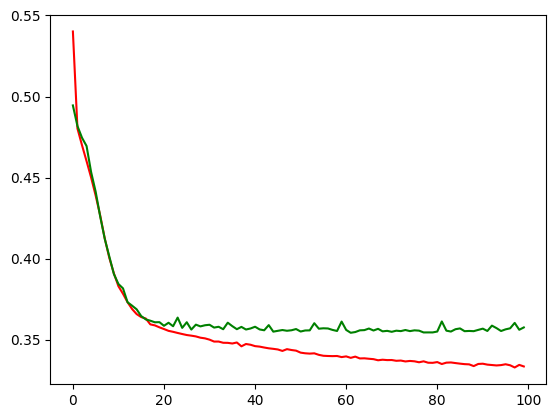

In [33]:
plt.plot(hist_obj.history['loss'], color='red')
plt.plot(hist_obj.history['val_loss'], color='green')

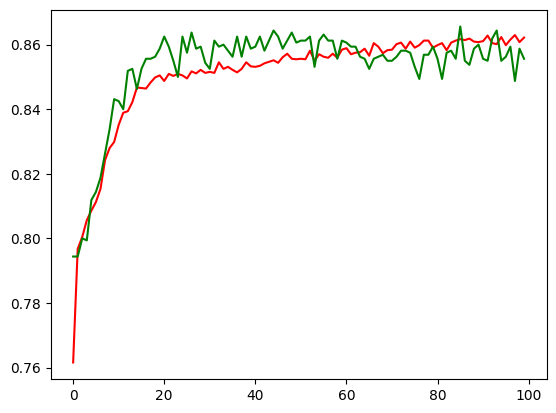

In [34]:
plt.plot(hist_obj.history['accuracy'], color='red')
plt.plot(hist_obj.history['val_accuracy'], color='green')